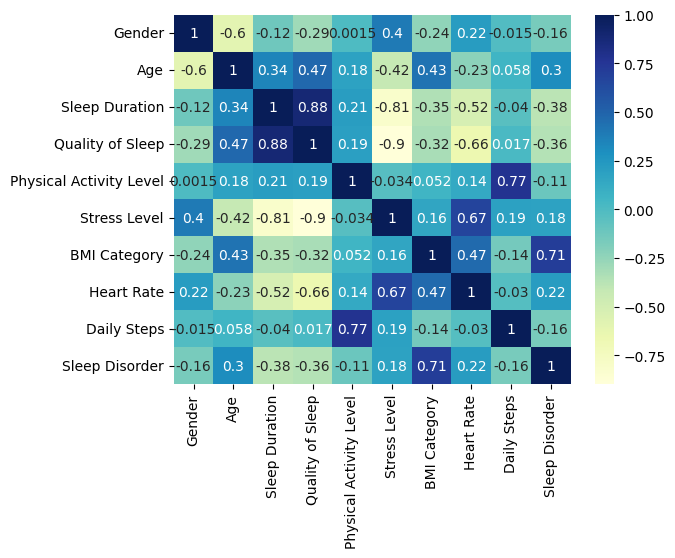

Accuracy is  89.38053097345133


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as mp


sh = pd.read_excel ('sleepHealth.xlsx')

Gender_mapping = {"Female": 0, "Male": 1}
sh['Gender'] = sh['Gender'].map(Gender_mapping)

BMICategory_mapping = {"Normal": 0, "Overweight": 1, "Obese": 2}
sh['BMI Category'] = sh['BMI Category'].map(BMICategory_mapping)

SleepDisorder_mapping = {"Sleep": 0, "Sleep Apnea": 1, "Insomnia": 2}
sh['Sleep Disorder'] = sh['Sleep Disorder'].map(SleepDisorder_mapping)

sh = sh.drop(columns=(["Person ID", "Occupation", "Blood Pressure"]), axis =1)

dataplot = sb.heatmap(sh.corr(), cmap= "YlGnBu", annot=True)
mp.show()
sh.to_csv("Modified.csv")

#Seperating the Target Value
X = sh.values[:, 0:8]
Y = sh.values[:, 9]

# Splitting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=42)

# Function to perform training wih entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=4, min_samples_leaf=6)
clf_entropy.fit(X_train, y_train)

y_pred_en = clf_entropy.predict(X_test)

print("Accuracy is ", accuracy_score(y_test, y_pred_en)* 100)


